In [3]:
%load_ext autoreload
%autoreload 2
%env CUDA_VISIBLE_DEVICES=[]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
env: CUDA_VISIBLE_DEVICES=[]


# Insect vocalizations
Source:
- https://link.springer.com/chapter/10.1007/978-3-319-26561-2_42
- https://link.springer.com/chapter/10.1007/978-1-4614-3501-3_24

In [4]:
from pathlib2 import Path
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import re
import librosa

In [5]:
from tqdm.autonotebook import tqdm
from librosa.core.time_frequency import mel_frequencies
from avgn.signalprocessing.spectrogramming_tf import spectrogram_tensorflow
from avgn.utils.audio import load_wav, float32_to_int16, int16_to_float32, write_wav
from avgn.visualization.spectrogram import visualize_spec, plot_spec
from avgn.utils.general import HParams
from avgn.signalprocessing.filtering import butter_bandpass_filter
from avgn.signalprocessing import spectrogramming as sg
import wave

/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


### data locations

In [6]:
DSLOC = Path('/mnt/cube/Datasets/insectORIG')

In [7]:
DSLOC

PosixPath('/mnt/cube/Datasets/insectORIG')

### load wavs

In [8]:
wavs = list(DSLOC.glob('*.wav'))
len(wavs), wavs[:3]

(381,
 [PosixPath('/mnt/cube/Datasets/insectORIG/CC_139CS.wav'),
  PosixPath('/mnt/cube/Datasets/insectORIG/KA_himegisu.wav'),
  PosixPath('/mnt/cube/Datasets/insectORIG/CR_479scdg.wav')])

In [11]:
wav_df = pd.DataFrame(
    [[i, i.stem.split("_")[0], i.stem.split("_")[1]] for i in wavs],
    columns=["wavloc", "species_group", "species"],
)

In [12]:
wav_df[:3]

wavloc species_group   species
0     /mnt/cube/Datasets/insectORIG/CC_139CS.wav            CC     139CS
1  /mnt/cube/Datasets/insectORIG/KA_himegisu.wav            KA  himegisu
2   /mnt/cube/Datasets/insectORIG/CR_479scdg.wav            CR   479scdg

In [14]:
rate = 44100

In [31]:
win_length_ms = 1
hop_length_ms = .1
print(win_length_ms / 1000 * rate)
print(hop_length_ms / 1000 * rate)

hparams = HParams(
    # spectrogramming
    win_length=int(rate / 1000 * win_length_ms),
    n_fft=4800,
    hop_length=int(rate / 1000 * hop_length_ms),
    ref_level_db=20,
    min_level_db=-80,
    preemphasis=0.97,
    # mel scaling
    num_mel_bins=128,
    mel_lower_edge_hertz=1000,
    mel_upper_edge_hertz=rate/2,
    # inversion
    power=1.5,  # for spectral inversion
    griffin_lim_iters=50,
    pad=True,
    #
)

44.1
4.41


### Show spectrogram

In [32]:
len(data)/rate

0.5

CC_139CS


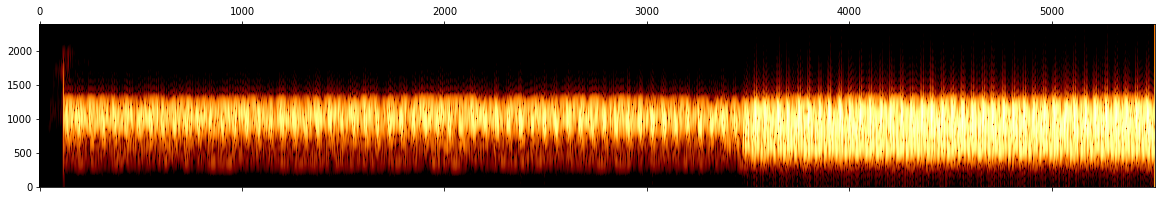

KA_himegisu


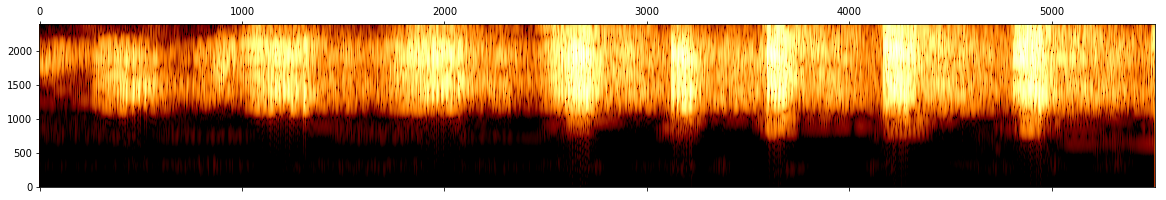

CR_479scdg


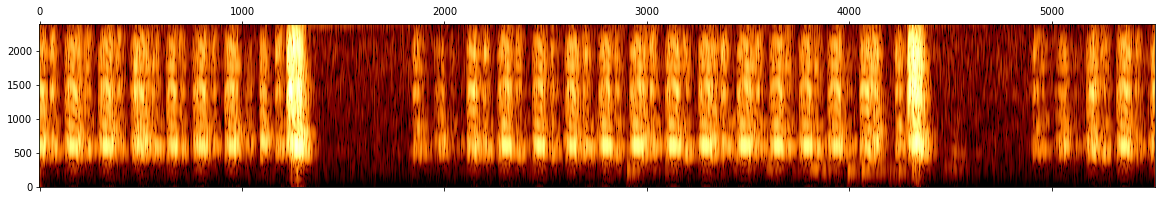

CC_160CSD


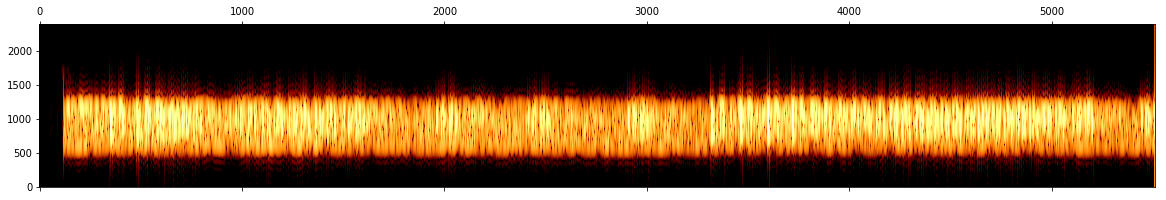

CC_048CSC


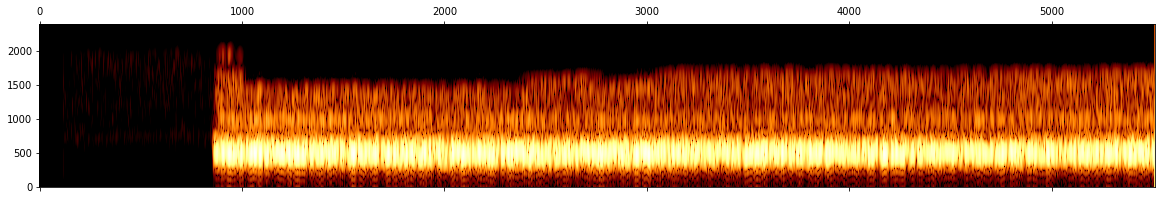

MQ_asiantigermosquitofemale


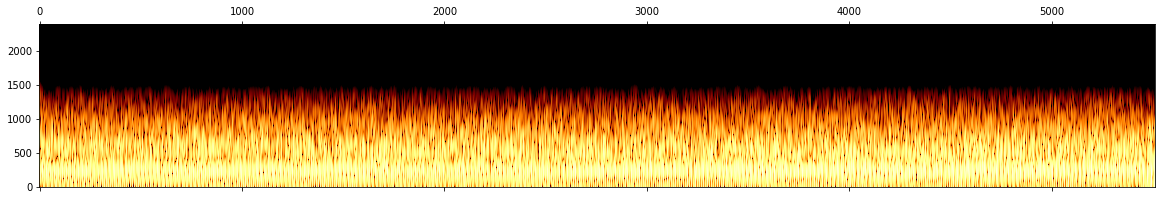

CR_468ssdw


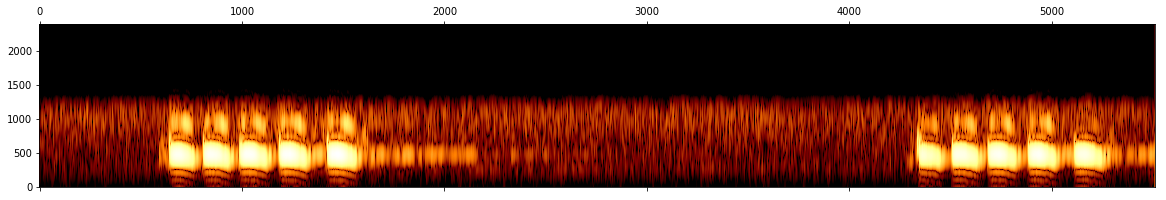

KA_192ls


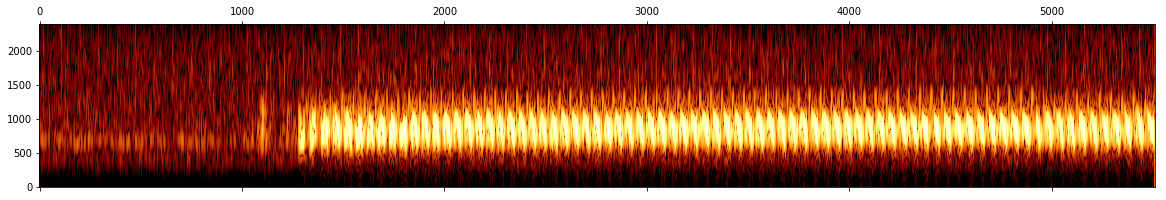

KA_233sl


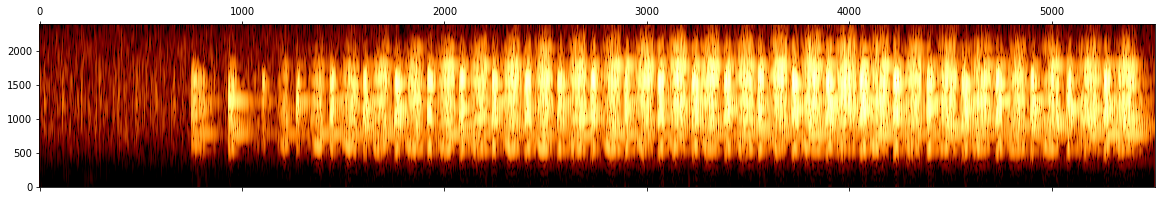

CR_450ss


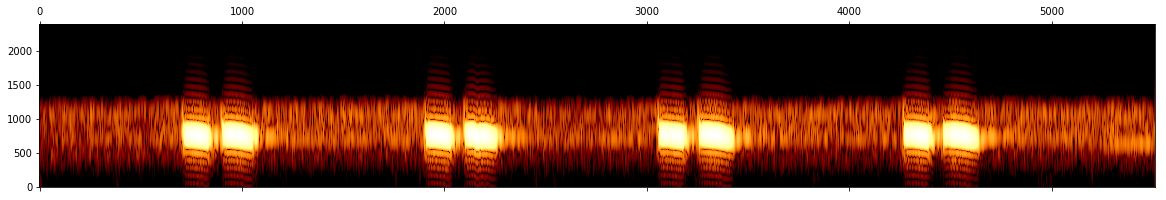

CC_089CS1


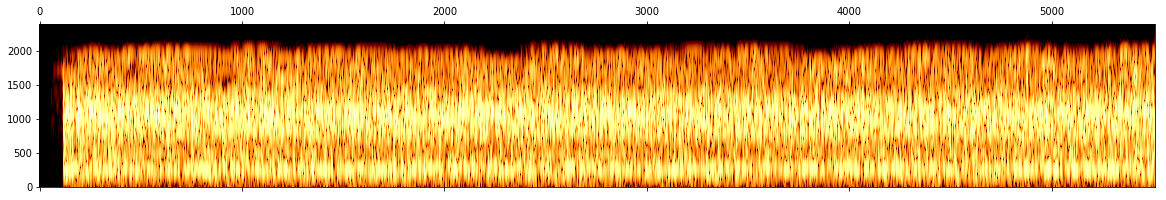

KA_gladiator_meadow_katydid


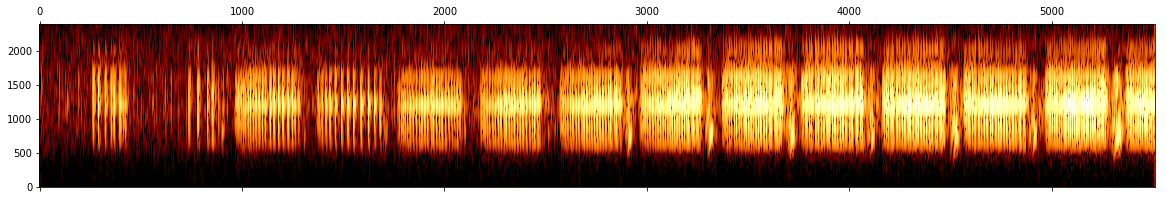

CR_618ss


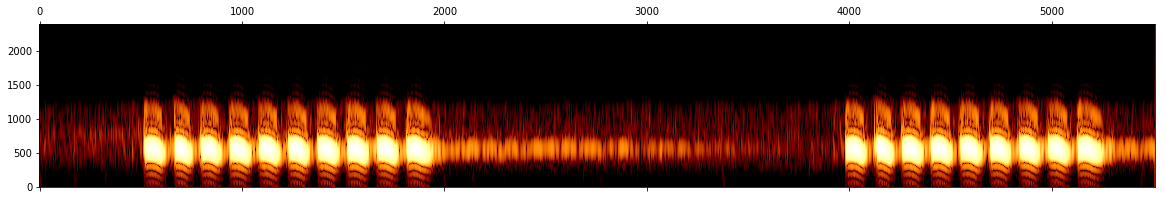

CC_830sl


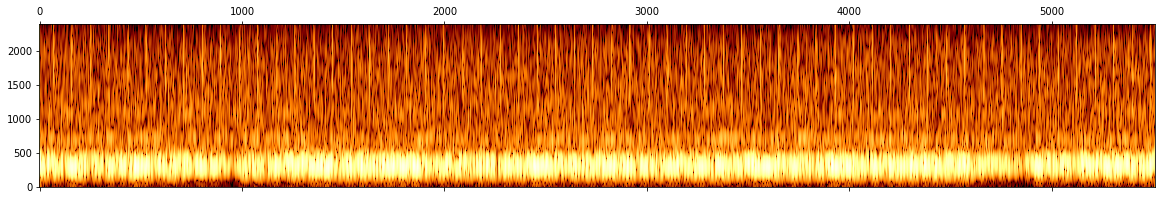

CC_cicada3


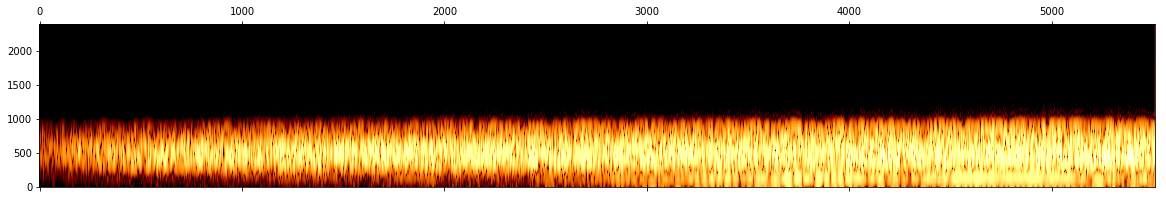

WA_yellowjacket-wasp


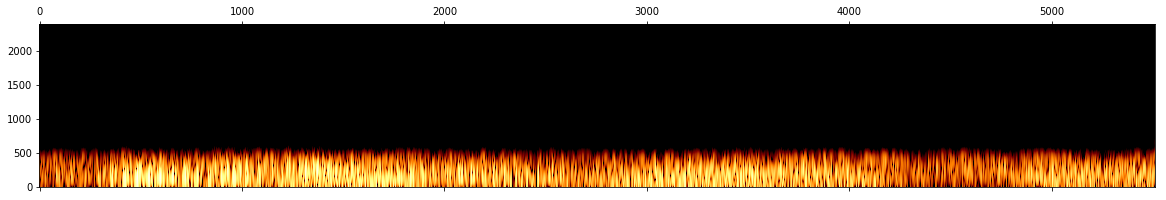

CR_614ss


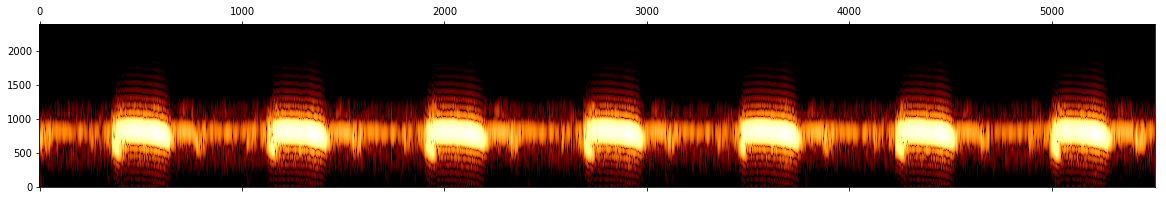

CC_216CS2


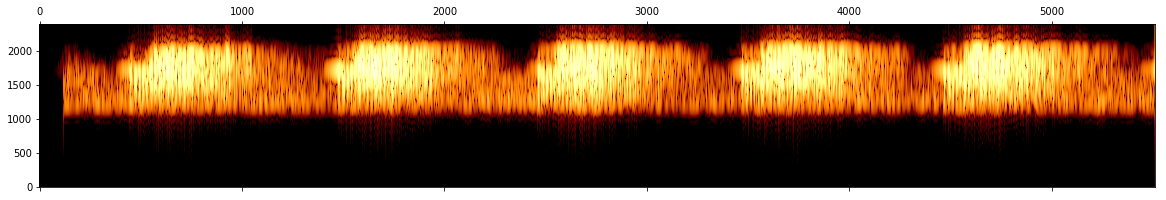

CC_004CS1


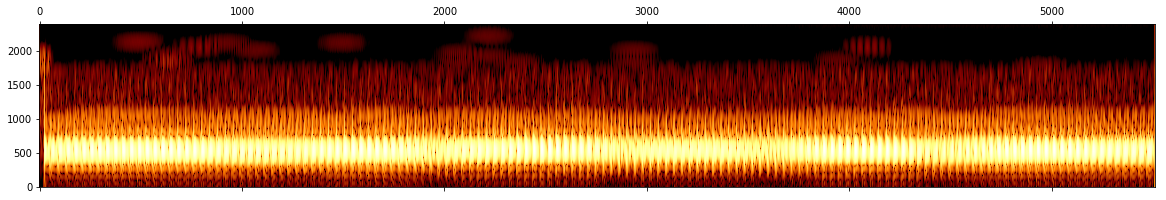

CR_686ss


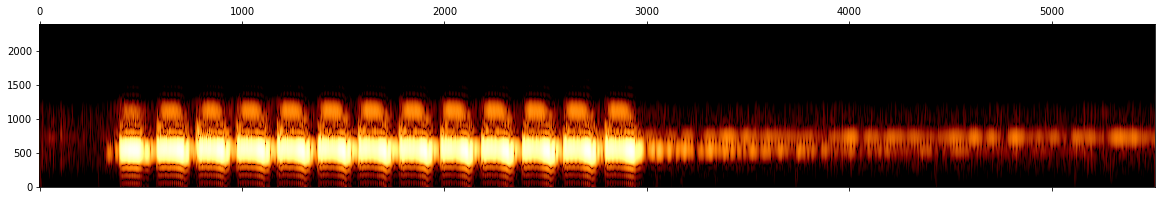

In [34]:
for idx, row in wav_df[:20].iterrows():
    print(row.wavloc.stem)
    data, rate = librosa.core.load(
                path=row.wavloc,
                sr=None,
                duration = 0.5,
                mono=True
            )
    audio = butter_bandpass_filter(data, lowcut = 500, highcut=int(rate/2)-2, fs=rate, order=4)
    spectrogram = sg.spectrogram(audio, hparams)
    fig, ax = plt.subplots(figsize=(20,3))
    ax.matshow(spectrogram, origin='lower', aspect='auto', cmap = plt.cm.afmhot)
    plt.show()